In [1]:
import pandas 
dd = pandas.read_csv(r'C:\Users\Access\Downloads\eurusd_.csv')
import pandas as pd

# افترض أن الداتا فريم الخاص بك يسمى df
# لاختيار الأعمدة المطلوبة فقط
df = dd[['Gmt time', 'Open', 'High', 'Low', 'Close']]

In [2]:
df

,Gmt time,Open,High,Low,Close
0,2024-04-01 00:01:39.471,1.07944,1.07944,1.07944,1.07944
1,2024-04-01 00:01:40.638,1.07944,1.07944,1.07944,1.07944
2,2024-04-01 00:01:40.794,1.07944,1.07944,1.07944,1.07944
3,2024-04-01 00:01:41.199,1.07944,1.07944,1.07944,1.07944
4,2024-04-01 00:01:42.768,1.07944,1.07944,1.07944,1.07944
...,...,...,...,...,...
9059327,2024-09-27 20:59:58.689,1.11628,1.11628,1.11628,1.11628
9059328,2024-09-27 20:59:58.740,1.11617,1.11617,1.11617,1.11617
9059329,2024-09-27 20:59:58.941,1.11614,1.11614,1.11614,1.11614
9059330,2024-09-27 20:59:59.094,1.11619,1.11619,1.11619,1.11619


In [3]:
import pandas as pd

# افترض أن df هو الداتا فريم الخاص بك
# تأكد من أن عمود "Gmt time" هو من نوع datetime
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# تعيين "Gmt time" كفهرس للداتا فريم
df.set_index('Gmt time', inplace=True)

# إعادة تشكيل البيانات إلى دقيقة واحدة
minute_data = df.resample('1T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
}).dropna()

# إعادة تعيين الفهرس ليكون "Gmt time" كعمود عادي
minute_data.reset_index(inplace=True)

# عرض البيانات المعاد تشكيلها
print(minute_data[['Gmt time', 'Open', 'High', 'Low', 'Close']])


C:\Users\Access\AppData\Local\Temp\ipykernel_3076\1981020341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gmt time'] = pd.to_datetime(df['Gmt time'])
C:\Users\Access\AppData\Local\Temp\ipykernel_3076\1981020341.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  minute_data = df.resample('1T').agg({


                  Gmt time     Open     High      Low    Close
0      2024-04-01 00:01:00  1.07944  1.07944  1.07933  1.07933
1      2024-04-01 00:02:00  1.07933  1.07934  1.07930  1.07933
2      2024-04-01 00:03:00  1.07933  1.07953  1.07932  1.07947
3      2024-04-01 00:04:00  1.07946  1.07950  1.07944  1.07947
4      2024-04-01 00:05:00  1.07947  1.07958  1.07947  1.07955
...                    ...      ...      ...      ...      ...
181278 2024-09-27 20:55:00  1.11591  1.11628  1.11589  1.11627
181279 2024-09-27 20:56:00  1.11627  1.11664  1.11625  1.11626
181280 2024-09-27 20:57:00  1.11626  1.11639  1.11589  1.11629
181281 2024-09-27 20:58:00  1.11629  1.11649  1.11629  1.11630
181282 2024-09-27 20:59:00  1.11626  1.11634  1.11614  1.11619

[181283 rows x 5 columns]


In [4]:
minute_data

,Gmt time,Open,High,Low,Close
0,2024-04-01 00:01:00,1.07944,1.07944,1.07933,1.07933
1,2024-04-01 00:02:00,1.07933,1.07934,1.07930,1.07933
2,2024-04-01 00:03:00,1.07933,1.07953,1.07932,1.07947
3,2024-04-01 00:04:00,1.07946,1.07950,1.07944,1.07947
4,2024-04-01 00:05:00,1.07947,1.07958,1.07947,1.07955
...,...,...,...,...,...
181278,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627
181279,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626
181280,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629
181281,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630


In [5]:
import pandas as pd
import pandas_ta as ta

df = minute_data

# افترض أن df هو الداتا فريم الخاص بك
# تأكد من أن عمود "Gmt time" هو من نوع datetime
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# تعيين "Gmt time" كفهرس للداتا فريم
df.set_index('Gmt time', inplace=True)

# حساب المتوسطات المتحركة الأسية (EMA)
df['EMA_100'] = ta.ema(df['Close'], length=100)
df['EMA_50'] = ta.ema(df['Close'], length=50)
df['EMA_21'] = ta.ema(df['Close'], length=21)
df['EMA_13'] = ta.ema(df['Close'], length=13)
df['EMA_7'] = ta.ema(df['Close'], length=7)

# حساب مؤشر القوة النسبية (RSI)
df['RSI_10'] = ta.rsi(df['Close'], length=10)

# حساب متوسط النطاق الحقيقي (ATR)
df['ATR_10'] = ta.atr(df['High'], df['Low'], df['Close'], length=10)
df['ATR_30'] = ta.atr(df['High'], df['Low'], df['Close'], length=30)

# إعادة تعيين الفهرس ليكون "Gmt time" كعمود عادي
df.reset_index(inplace=True)

# عرض البيانات مع الأعمدة الجديدة
print(df[['Gmt time', 'Open', 'High', 'Low', 'Close', 'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7', 'RSI_10', 'ATR_10', 'ATR_30']])


                  Gmt time     Open     High      Low    Close   EMA_100  \
0      2024-04-01 00:01:00  1.07944  1.07944  1.07933  1.07933       NaN   
1      2024-04-01 00:02:00  1.07933  1.07934  1.07930  1.07933       NaN   
2      2024-04-01 00:03:00  1.07933  1.07953  1.07932  1.07947       NaN   
3      2024-04-01 00:04:00  1.07946  1.07950  1.07944  1.07947       NaN   
4      2024-04-01 00:05:00  1.07947  1.07958  1.07947  1.07955       NaN   
...                    ...      ...      ...      ...      ...       ...   
181278 2024-09-27 20:55:00  1.11591  1.11628  1.11589  1.11627  1.116376   
181279 2024-09-27 20:56:00  1.11627  1.11664  1.11625  1.11626  1.116374   
181280 2024-09-27 20:57:00  1.11626  1.11639  1.11589  1.11629  1.116372   
181281 2024-09-27 20:58:00  1.11629  1.11649  1.11629  1.11630  1.116371   
181282 2024-09-27 20:59:00  1.11626  1.11634  1.11614  1.11619  1.116367   

          EMA_50    EMA_21    EMA_13     EMA_7     RSI_10    ATR_10    ATR_30  
0      

In [8]:
df

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30
0,2024-04-01 00:01:00,1.07944,1.07944,1.07933,1.07933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-01 00:02:00,1.07933,1.07934,1.07930,1.07933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-01 00:03:00,1.07933,1.07953,1.07932,1.07947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-04-01 00:04:00,1.07946,1.07950,1.07944,1.07947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-04-01 00:05:00,1.07947,1.07958,1.07947,1.07955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181278,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627,1.116376,1.116321,1.116190,1.116116,1.116064,56.965559,0.000108,0.000079
181279,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626,1.116374,1.116319,1.116196,1.116137,1.116113,56.155211,0.000136,0.000090
181280,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629,1.116372,1.116318,1.116205,1.116159,1.116157,58.140099,0.000172,0.000103
181281,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630,1.116371,1.116317,1.116213,1.116179,1.116193,58.830388,0.000175,0.000107


In [6]:
import pandas as pd

# افترض أن df هو الداتا فريم الخاص بك

# حذف أول 100 سطر
df = df.iloc[100:]

# إعادة ترتيب الفهرس
df.reset_index(drop=True, inplace=True)

# عرض الداتا فريم بعد التعديل
print(df)


                  Gmt time     Open     High      Low    Close   EMA_100  \
0      2024-04-01 01:41:00  1.07907  1.07915  1.07907  1.07912  1.079403   
1      2024-04-01 01:42:00  1.07912  1.07912  1.07904  1.07908  1.079397   
2      2024-04-01 01:43:00  1.07908  1.07911  1.07903  1.07903  1.079389   
3      2024-04-01 01:44:00  1.07905  1.07906  1.07903  1.07903  1.079382   
4      2024-04-01 01:45:00  1.07901  1.07901  1.07890  1.07890  1.079373   
...                    ...      ...      ...      ...      ...       ...   
181178 2024-09-27 20:55:00  1.11591  1.11628  1.11589  1.11627  1.116376   
181179 2024-09-27 20:56:00  1.11627  1.11664  1.11625  1.11626  1.116374   
181180 2024-09-27 20:57:00  1.11626  1.11639  1.11589  1.11629  1.116372   
181181 2024-09-27 20:58:00  1.11629  1.11649  1.11629  1.11630  1.116371   
181182 2024-09-27 20:59:00  1.11626  1.11634  1.11614  1.11619  1.116367   

          EMA_50    EMA_21    EMA_13     EMA_7     RSI_10    ATR_10    ATR_30  
0      

In [8]:
df

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30
0,2024-04-01 01:41:00,1.07907,1.07915,1.07907,1.07912,1.079403,1.079246,1.079149,1.079111,1.079081,47.936751,0.000079,0.000089
1,2024-04-01 01:42:00,1.07912,1.07912,1.07904,1.07908,1.079397,1.079239,1.079143,1.079107,1.079080,44.309577,0.000080,0.000089
2,2024-04-01 01:43:00,1.07908,1.07911,1.07903,1.07903,1.079389,1.079231,1.079132,1.079096,1.079068,40.095848,0.000080,0.000088
3,2024-04-01 01:44:00,1.07905,1.07906,1.07903,1.07903,1.079382,1.079223,1.079123,1.079086,1.079058,40.095848,0.000075,0.000086
4,2024-04-01 01:45:00,1.07901,1.07901,1.07890,1.07890,1.079373,1.079210,1.079103,1.079060,1.079019,30.718874,0.000080,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181178,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627,1.116376,1.116321,1.116190,1.116116,1.116064,56.965559,0.000108,0.000079
181179,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626,1.116374,1.116319,1.116196,1.116137,1.116113,56.155211,0.000136,0.000090
181180,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629,1.116372,1.116318,1.116205,1.116159,1.116157,58.140099,0.000172,0.000103
181181,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630,1.116371,1.116317,1.116213,1.116179,1.116193,58.830388,0.000175,0.000107


In [9]:
import pandas as pd
import numpy as np



# افترض أن df هو DataFrame الخاص بك
df['Signal'] = np.where((df['EMA_13'] > df['EMA_21']) & (df['EMA_13'].shift(1) <= df['EMA_21'].shift(1)), 1, 0)
df['Signal'] = np.where((df['EMA_13'] < df['EMA_21']) & (df['EMA_13'].shift(1) >= df['EMA_21'].shift(1)), -1, df['Signal'])

df['Take Profit'] = np.where(df['Signal'] == 1, df['Open'] + 0.0004, np.where(df['Signal'] == -1, df['Open'] - 0.0004, 0))
df['Stop Loss'] = np.where(df['Signal'] == 1, df['Open'] - 0.0004, np.where(df['Signal'] == -1, df['Open'] + 0.0004, 0))

df['Result'] = ''
for i in range(len(df)):
    if df.at[i, 'Signal'] != 0:
        take_profit = df.at[i, 'Take Profit']
        stop_loss = df.at[i, 'Stop Loss']
        if df.at[i, 'Signal'] == 1:
            win_condition = (df['High'][i+1:] >= take_profit).idxmax()
            loss_condition = (df['Low'][i+1:] <= stop_loss).idxmax()
        else:
            win_condition = (df['Low'][i+1:] <= take_profit).idxmax()
            loss_condition = (df['High'][i+1:] >= stop_loss).idxmax()
        
        if win_condition < loss_condition:
            df.at[i, 'Result'] = 'WIN' #win
        elif loss_condition < win_condition:
            df.at[i, 'Result'] = 'LOSS' #loss
        else:
            df.at[i, 'Result'] = 'NONE' #non


# عرض النتائج النهائية
df


C:\Users\Access\AppData\Local\Temp\ipykernel_3076\571255293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'] = np.where((df['EMA_13'] > df['EMA_21']) & (df['EMA_13'].shift(1) <= df['EMA_21'].shift(1)), 1, 0)
C:\Users\Access\AppData\Local\Temp\ipykernel_3076\571255293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'] = np.where((df['EMA_13'] < df['EMA_21']) & (df['EMA_13'].shift(1) >= df['EMA_21'].shift(1)), -1, df['Signal'])
C:\Users\Access\AppData\Local\Temp\ipykernel_3076\57

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2024-04-01 01:41:00,1.07907,1.07915,1.07907,1.07912,1.079403,1.079246,1.079149,1.079111,1.079081,47.936751,0.000079,0.000089,0,0.0,0.0,
1,2024-04-01 01:42:00,1.07912,1.07912,1.07904,1.07908,1.079397,1.079239,1.079143,1.079107,1.079080,44.309577,0.000080,0.000089,0,0.0,0.0,
2,2024-04-01 01:43:00,1.07908,1.07911,1.07903,1.07903,1.079389,1.079231,1.079132,1.079096,1.079068,40.095848,0.000080,0.000088,0,0.0,0.0,
3,2024-04-01 01:44:00,1.07905,1.07906,1.07903,1.07903,1.079382,1.079223,1.079123,1.079086,1.079058,40.095848,0.000075,0.000086,0,0.0,0.0,
4,2024-04-01 01:45:00,1.07901,1.07901,1.07890,1.07890,1.079373,1.079210,1.079103,1.079060,1.079019,30.718874,0.000080,0.000088,0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181178,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627,1.116376,1.116321,1.116190,1.116116,1.116064,56.965559,0.000108,0.000079,0,0.0,0.0,
181179,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626,1.116374,1.116319,1.116196,1.116137,1.116113,56.155211,0.000136,0.000090,0,0.0,0.0,
181180,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629,1.116372,1.116318,1.116205,1.116159,1.116157,58.140099,0.000172,0.000103,0,0.0,0.0,
181181,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630,1.116371,1.116317,1.116213,1.116179,1.116193,58.830388,0.000175,0.000107,0,0.0,0.0,


In [10]:
df

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
0,2024-04-01 01:41:00,1.07907,1.07915,1.07907,1.07912,1.079403,1.079246,1.079149,1.079111,1.079081,47.936751,0.000079,0.000089,0,0.0,0.0,
1,2024-04-01 01:42:00,1.07912,1.07912,1.07904,1.07908,1.079397,1.079239,1.079143,1.079107,1.079080,44.309577,0.000080,0.000089,0,0.0,0.0,
2,2024-04-01 01:43:00,1.07908,1.07911,1.07903,1.07903,1.079389,1.079231,1.079132,1.079096,1.079068,40.095848,0.000080,0.000088,0,0.0,0.0,
3,2024-04-01 01:44:00,1.07905,1.07906,1.07903,1.07903,1.079382,1.079223,1.079123,1.079086,1.079058,40.095848,0.000075,0.000086,0,0.0,0.0,
4,2024-04-01 01:45:00,1.07901,1.07901,1.07890,1.07890,1.079373,1.079210,1.079103,1.079060,1.079019,30.718874,0.000080,0.000088,0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181178,2024-09-27 20:55:00,1.11591,1.11628,1.11589,1.11627,1.116376,1.116321,1.116190,1.116116,1.116064,56.965559,0.000108,0.000079,0,0.0,0.0,
181179,2024-09-27 20:56:00,1.11627,1.11664,1.11625,1.11626,1.116374,1.116319,1.116196,1.116137,1.116113,56.155211,0.000136,0.000090,0,0.0,0.0,
181180,2024-09-27 20:57:00,1.11626,1.11639,1.11589,1.11629,1.116372,1.116318,1.116205,1.116159,1.116157,58.140099,0.000172,0.000103,0,0.0,0.0,
181181,2024-09-27 20:58:00,1.11629,1.11649,1.11629,1.11630,1.116371,1.116317,1.116213,1.116179,1.116193,58.830388,0.000175,0.000107,0,0.0,0.0,


In [39]:
df['Result'] = df['Result'].replace("", "NONE")


In [40]:
df[130:180]

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
130,2024-04-01 03:51:00,1.07896,1.07900,1.07896,1.07896,1.078805,1.078797,1.078877,1.078919,1.078947,59.948217,0.000054,0.000057,0,0.00000,0.00000,NONE
131,2024-04-01 03:52:00,1.07897,1.07900,1.07897,1.07898,1.078809,1.078804,1.078887,1.078928,1.078955,62.027353,0.000053,0.000057,0,0.00000,0.00000,NONE
132,2024-04-01 03:53:00,1.07897,1.07900,1.07893,1.07898,1.078812,1.078811,1.078895,1.078936,1.078962,62.027353,0.000055,0.000057,0,0.00000,0.00000,NONE
133,2024-04-01 03:54:00,1.07899,1.07903,1.07898,1.07898,1.078816,1.078817,1.078903,1.078942,1.078966,62.027353,0.000054,0.000057,0,0.00000,0.00000,NONE
134,2024-04-01 03:55:00,1.07899,1.07907,1.07898,1.07907,1.078821,1.078827,1.078918,1.078960,1.078992,71.242416,0.000058,0.000058,0,0.00000,0.00000,NONE
135,2024-04-01 03:56:00,1.07906,1.07913,1.07906,1.07912,1.078826,1.078839,1.078936,1.078983,1.079024,74.989060,0.000059,0.000058,0,0.00000,0.00000,NONE
136,2024-04-01 03:57:00,1.07913,1.07913,1.07910,1.07910,1.078832,1.078849,1.078951,1.079000,1.079043,70.884570,0.000056,0.000057,0,0.00000,0.00000,NONE
137,2024-04-01 03:58:00,1.07910,1.07910,1.07901,1.07903,1.078836,1.078856,1.078958,1.079004,1.079040,58.444318,0.000059,0.000058,0,0.00000,0.00000,NONE
138,2024-04-01 03:59:00,1.07902,1.07903,1.07900,1.07903,1.078840,1.078863,1.078965,1.079008,1.079037,58.444318,0.000056,0.000057,0,0.00000,0.00000,NONE
139,2024-04-01 04:00:00,1.07902,1.07911,1.07902,1.07909,1.078845,1.078872,1.078976,1.079020,1.079051,64.953044,0.000060,0.000059,0,0.00000,0.00000,NONE


In [41]:
df.to_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv", index=False)

In [105]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# استبدل 'eurusd_ema_13_31_tp_4_sl_4.csv' باسم ملف البيانات الخاص بك والذي يحتوي على جميع الصفقات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

data['Result'] = data['Result'].map({'WIN': 2, 'LOSS': 1, 'NONE': 0})

# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

y = data['Result']

# تقسيم البيانات للتصنيف (تصنيف الصفقات)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y, test_size=0.2, random_state=42)

# إنشاء مجموعة بيانات LightGBM للتصنيف
train_data_clf = lgb.Dataset(X_train_clf, label=y_train_clf)
test_data_clf = lgb.Dataset(X_test_clf, label=y_test_clf)

# تحديد المعلمات للتصنيف
params_clf = {
    'objective': 'multiclass',
    'num_class': 3,  # ثلاث فئات: رابحة، خاسرة، لم تفتح
    'metric': 'multi_logloss',
    'learning_rate': 0.20,
    'num_leaves': 50,
    'verbose': -1
}

# تدريب النموذج 
model_clf = lgb.train(
    params_clf,
    train_data_clf,
    num_boost_round=10000,
    valid_sets=[test_data_clf],
    valid_names=['valid'],
)

# التنبؤ على بيانات الاختبار
y_pred_clf = model_clf.predict(X_test_clf)

# مثال لتحويل القيم المتوقعة إلى فئات:
y_pred_clf_labels = np.round(y_pred_clf).astype(int)  # تحويل الأرقام المستمرة إلى فئات (0 أو 1 أو 2)


# تحويل الاحتمالات إلى فئات (0, 1, 2)
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)

print(classification_report(y_test_clf, y_pred_clf_labels))

# افترض أن y_pred_clf_labels هي التوقعات بعد التحويل
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)

# حساب عدد القيم 0, 1, 2 في y_pred_clf_labels
counts_pred = np.bincount(y_pred_clf_labels)

# حساب عدد القيم 0, 1, 2 في y_test_clf
counts_test = np.bincount(y_test_clf)

# تحويل العدادات إلى DataFrame
df_counts_pred = pd.DataFrame(counts_pred, columns=['Count'], index=[0, 1, 2])
df_counts_test = pd.DataFrame(counts_test, columns=['Count'], index=[0, 1, 2])

# عرض النتائج
print("عدد القيم في y_pred_clf_labels:")
print(df_counts_pred)
print("\nعدد القيم في y_test_clf:")
print(df_counts_test)

#--------------------------------------------------------------------------------

# حساب دقة التوقعات
accuracy = accuracy_score(y_test_clf, y_pred_clf_labels)

# طباعة الدقة كنسبة مئوية
print(f"دقة التوقعات: {accuracy * 100:.2f}%")



              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34778
           1       0.03      0.00      0.01       636
           2       0.03      0.00      0.01       823

    accuracy                           0.96     36237
   macro avg       0.34      0.33      0.33     36237
weighted avg       0.92      0.96      0.94     36237

عدد القيم في y_pred_clf_labels:
   Count
0  36067
1     76
2     94

عدد القيم في y_test_clf:
   Count
0  34778
1    636
2    823
دقة التوقعات: 95.54%


In [107]:
# حفظ النموذج إلى ملف
model_clf.save_model(r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # حفظ النموذج في ملف نصي

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3182, number of used features: 12
[LightGBM] [Info] Start training from score 1.087544


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.0001466765966890826


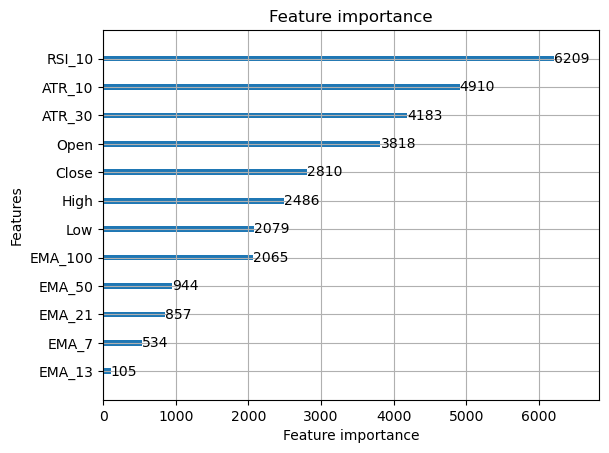

In [17]:
# استيراد المكتبات اللازمة
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# قراءة البيانات
# استبدل 'data.csv' باسم ملف البيانات الخاص بك
df = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف السطور التي تحتوي على 'LOSS' أو 'NONE' في عمود 'Result'
data = df[~df['Result'].isin(['LOSS', 'NONE'])]

# تجهيز الميزات (X) والأهداف (y)
# الميزات X

X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

# الهدف y - اختر الهدف الذي تريد التنبؤ به
# لنفترض أننا نريد التنبؤ بـ 'Take Profit'
y = data['Take Profit']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء مجموعة بيانات LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# تحديد المعلمات للانحدار
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 32,
    'verbose': 1
}

# تدريب النموذج بدون الإيقاف المبكر
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[test_data],
    valid_names=['valid']
)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم الأداء باستخدام RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# عرض أهمية الميزات
lgb.plot_importance(model, max_num_features=20)
plt.show()



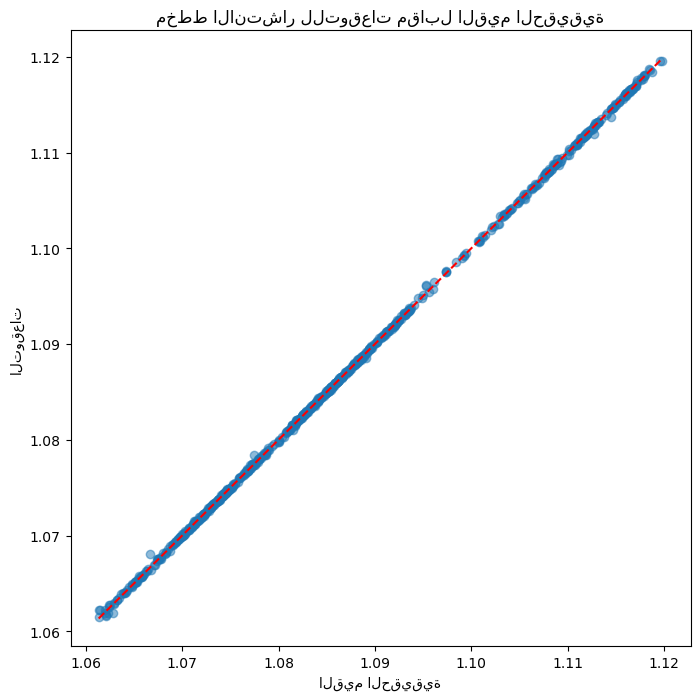

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('القيم الحقيقية')
plt.ylabel('التوقعات')
plt.title('مخطط الانتشار للتوقعات مقابل القيم الحقيقية')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط الهوية
plt.show()

In [16]:
data

,Gmt time,Open,High,Low,Close,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result
43,2024-04-01 02:24:00,1.07865,1.07870,1.07865,1.07870,1.078986,1.078771,1.078667,1.078668,1.078681,55.545312,0.000059,0.000070,1,1.07905,1.07825,WIN
48,2024-04-01 02:29:00,1.07869,1.07876,1.07869,1.07876,1.078955,1.078752,1.078668,1.078671,1.078684,61.596977,0.000066,0.000071,1,1.07909,1.07829,WIN
76,2024-04-01 02:57:00,1.07876,1.07879,1.07873,1.07873,1.078894,1.078793,1.078800,1.078799,1.078782,39.439384,0.000057,0.000063,-1,1.07836,1.07916,WIN
148,2024-04-01 04:09:00,1.07885,1.07886,1.07884,1.07885,1.078866,1.078901,1.078965,1.078964,1.078929,34.226323,0.000061,0.000060,-1,1.07845,1.07925,WIN
191,2024-04-01 04:53:00,1.07866,1.07869,1.07866,1.07866,1.078720,1.078657,1.078603,1.078606,1.078628,64.992518,0.000046,0.000052,1,1.07906,1.07826,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180986,2024-09-27 17:43:00,1.11583,1.11590,1.11565,1.11572,1.115777,1.115746,1.115865,1.115859,1.115802,42.391635,0.000184,0.000165,-1,1.11543,1.11623,WIN
181028,2024-09-27 18:25:00,1.11619,1.11619,1.11613,1.11619,1.116052,1.116177,1.116282,1.116281,1.116246,41.807119,0.000108,0.000135,-1,1.11579,1.11659,WIN
181042,2024-09-27 18:39:00,1.11632,1.11637,1.11632,1.11635,1.116091,1.116193,1.116239,1.116241,1.116265,58.916507,0.000104,0.000124,1,1.11672,1.11592,WIN
181082,2024-09-27 19:19:00,1.11664,1.11670,1.11664,1.11668,1.116334,1.116464,1.116522,1.116531,1.116560,64.667655,0.000100,0.000106,1,1.11704,1.11624,WIN


         Actual  Predicted
18817   1.06764   1.067555
106419  1.09021   1.090308
30910   1.06518   1.065129
144375  1.11314   1.113211
108677  1.09318   1.093175
...         ...        ...
169525  1.11189   1.111809
101828  1.08336   1.083289
173635  1.11616   1.116117
158716  1.11097   1.110806
27208   1.07231   1.072268

[100 rows x 2 columns]


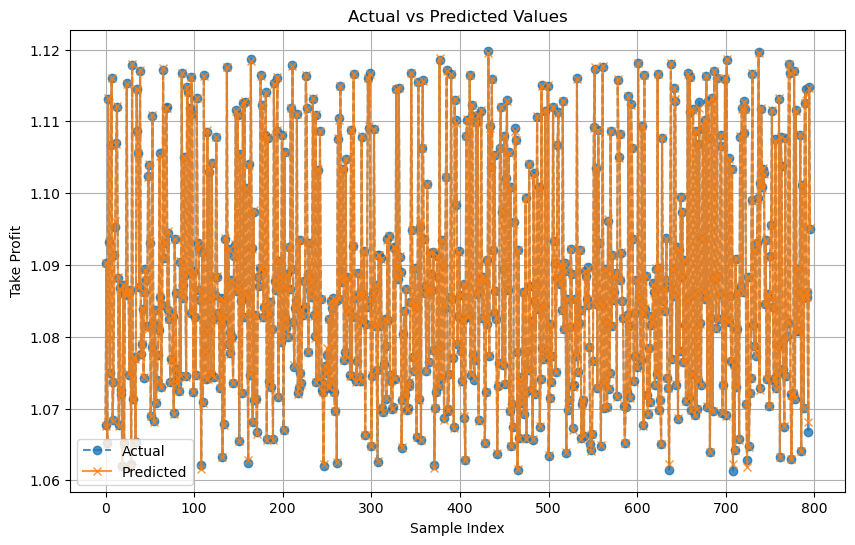

In [19]:
# إنشاء DataFrame للمقارنة بين القيم الحقيقية والقيم المتوقعة
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# عرض أول 10 قيم للمقارنة
print(comparison_df.head(100))

# رسم القيم الحقيقية مقابل القيم المتوقعة
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o', linestyle='--', alpha=0.8)
plt.plot(comparison_df['Predicted'].values, label='Predicted', marker='x', linestyle='-', alpha=0.8)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Take Profit')
plt.grid()
plt.show()


In [14]:
# حفظ النموذج إلى ملف
model.save_model(r'C:\Users\Access\Downloads\lightgbm_model_reg_.txt')  # حفظ النموذج في ملف نصي

In [167]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]  # الحصول على التوقع من نموذج السعر
    return predicted_target

# دالة تصنيف نوع الصفقة
def classify_trade_type(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    trade_type = classification_model.predict(features).argmax(axis=1)[0]  # تصنيف نوع الصفقة
    return trade_type  # مثال: 0 = بدون صفقة، 1 = شراء، -1 = بيع

# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Close']
    
    # تحديد نوع الصفقة بناءً على نموذج التصنيف
    trade_type = classify_trade_type(row)
    
    # متابعة فقط إذا كانت الصفقة إما شراء أو بيع
    if trade_type == 0:  # تخطي في حال عدم وجود صفقة
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    point_difference = abs(target_price - current_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تعيين وقف الخسارة بناءً على نفس الفارق
    stop_loss_price = current_price - point_difference if trade_type == 2 else current_price + point_difference

    # تحقق إذا كانت البيانات وصلت للهدف أو لوقف الخسارة
    if (trade_type == 2 and row['High'] >= target_price) or (trade_type == 1 and row['Low'] <= target_price):
        results['Reached_Target'] += 1  # تحقق الهدف
    elif (trade_type == 2 and row['Low'] <= stop_loss_price) or (trade_type == 1 and row['High'] >= stop_loss_price):
        results['Reached_Stop_Loss'] += 1  # تحقق وقف الخسارة

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])


نتائج اختبار الأداء:
عدد المرات التي وصل فيها السعر للهدف: 3175
عدد المرات التي وصل فيها السعر لوقف الخسارة: 178


In [2]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # تصنيف النتيجة
    outcome = classify_trade_outcome(row)
    
    # متابعة فقط إذا كانت الصفقة ناجحة (2)
    if outcome != 2:
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    point_difference = abs(target_price - current_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تحديد نوع الصفقة بناءً على الهدف المتوقع
    if target_price > current_price:
        trade_type = 2  # شراء
        stop_loss_price = current_price - point_difference
    else:
        trade_type = 1  # بيع
        stop_loss_price = current_price + point_difference

    # تحقق إذا كانت البيانات وصلت للهدف أو لوقف الخسارة
    if (trade_type == 2 and row['Open'] >= target_price) or (trade_type == 1 and row['Open'] <= target_price):
        results['Reached_Target'] += 1
    elif (trade_type == 2 and row['Open'] <= stop_loss_price) or (trade_type == 1 and row['Open'] >= stop_loss_price):
        results['Reached_Stop_Loss'] += 1

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])


نتائج اختبار الأداء:
عدد المرات التي وصل فيها السعر للهدف: 0
عدد المرات التي وصل فيها السعر لوقف الخسارة: 0


In [ ]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# حالة الصفقة
trade_open = False
target_price = None
stop_loss_price = None
trade_type = None

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # إذا لم تكن هناك صفقة مفتوحة
    if not trade_open:
        # تصنيف النتيجة
        outcome = classify_trade_outcome(row)
        
        # متابعة فقط إذا كانت الصفقة ناجحة (2)
        if outcome != 2:
            continue
        
        # توقع السعر المستهدف بناءً على نموذج التوقع السعري
        target_price = predict_target_price(row)
        point_difference = abs(target_price - current_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
        
        # تحديد نوع الصفقة بناءً على الهدف المتوقع
        if target_price > current_price:
            trade_type = 2  # شراء
            stop_loss_price = current_price - point_difference
        else:
            trade_type = 1  # بيع
            stop_loss_price = current_price + point_difference
        
        # تعيين حالة الصفقة كأنها مفتوحة
        trade_open = True
    else:
        # متابعة الصفقة المفتوحة
        for future_index, future_row in data[index+1:].iterrows():
            if (trade_type == 2 and future_row['High'] >= target_price) or (trade_type == 1 and future_row['Low'] <= target_price):
                results['Reached_Target'] += 1
                trade_open = False  # إغلاق الصفقة
                break
            elif (trade_type == 2 and future_row['Low'] <= stop_loss_price) or (trade_type == 1 and future_row['High'] >= stop_loss_price):
                results['Reached_Stop_Loss'] += 1
                trade_open = False  # إغلاق الصفقة
                break

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])


In [1]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعداد الرصيد والبروتوكول
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40
highest_balance = initial_balance
lowest_balance = initial_balance
trade_history = []  # قائمة لتسجيل تفاصيل الصفقات

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح/الخسارة بناءً على النقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    points = (exit_price - entry_price) if trade_type == 2 else (entry_price - exit_price)  # 2 = شراء، 1 = بيع
    return points * lot_size * 10  # قيمة النقطة الواحدة للوت 0.10


# إعداد النتائج
results = {
    'Reached_Target': 0,
    'Reached_Stop_Loss': 0
}

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # إذا لم تكن هناك صفقة مفتوحة
    outcome = classify_trade_outcome(row)
    if outcome != 2:  # فتح صفقة فقط إذا كان التوقع رابحًا
        continue

    # توقع الهدف ووقف الخسارة
    target_price = predict_target_price(row)
    point_difference = abs(target_price - current_price)

    if target_price > current_price:
        trade_type = 2  # شراء
        stop_loss_price = current_price - point_difference
    else:
        trade_type = 1  # بيع
        stop_loss_price = current_price + point_difference

    # متابعة السعر حتى تحقيق الهدف أو وقف الخسارة
    for future_index, future_row in data[index+1:].iterrows():
        if (trade_type == 2 and future_row['High'] >= target_price) or (trade_type == 1 and future_row['Low'] <= target_price):
            pnl = calculate_pnl(trade_type, current_price, target_price, lot_size) - commission
            balance += pnl
            results['Reached_Target'] += 1
            trade_history.append({
                'Trade_Type': 'Buy' if trade_type == 2 else 'Sell',
                'Entry_Price': current_price,
                'Exit_Price': target_price,
                'P&L': pnl,
                'Balance': balance
            })
            break
        elif (trade_type == 2 and future_row['Low'] <= stop_loss_price) or (trade_type == 1 and future_row['High'] >= stop_loss_price):
            pnl = calculate_pnl(trade_type, current_price, stop_loss_price, lot_size) - commission
            balance += pnl
            results['Reached_Stop_Loss'] += 1
            trade_history.append({
                'Trade_Type': 'Buy' if trade_type == 2 else 'Sell',
                'Entry_Price': current_price,
                'Exit_Price': stop_loss_price,
                'P&L': pnl,
                'Balance': balance
            })
            break

    # تحديث أعلى وأدنى الرصيد
    highest_balance = max(highest_balance, balance)
    lowest_balance = min(lowest_balance, balance)

# إنشاء DataFrame لتاريخ الصفقات
trade_df = pd.DataFrame(trade_history)

# حساب الإحصائيات
winning_trades = len(trade_df[trade_df['P&L'] > 0])
total_trades = len(trade_df)
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = highest_balance - lowest_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد المرات التي وصل فيها السعر للهدف:", results['Reached_Target'])
print("عدد المرات التي وصل فيها السعر لوقف الخسارة:", results['Reached_Stop_Loss'])
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", highest_balance)
print("أدنى رصيد:", lowest_balance)
print("الدرو داون:", drawdown)

print("نسبة الصفقات الرابحة:", f"{win_rate:.2f}%")

# حفظ تاريخ الصفقات إلى ملف CSV
trade_df.to_csv(r"C:\Users\Access\Downloads\trade_history__.csv", index=False)


نتائج اختبار الأداء:
عدد المرات التي وصل فيها السعر للهدف: 3127
عدد المرات التي وصل فيها السعر لوقف الخسارة: 115
الرصيد النهائي: -4486.401368247003
أعلى رصيد: 50.0
أدنى رصيد: -4486.401368247003
الدرو داون: 4536.401368247003
نسبة الصفقات الرابحة: 0.00%


In [2]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعدادات الرصيد واللوت والعمولة
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40

# بيانات للتقرير النهائي
trade_results = []
max_balance = balance
min_balance = balance

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح أو الخسارة للنقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    if trade_type == 2:  # شراء
        points = exit_price - entry_price
    else:  # بيع
        points = entry_price - exit_price

    pnl = points * lot_size * 10  # معامل لتحديد قيمة النقطة
    return pnl

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # تصنيف النتيجة
    outcome = classify_trade_outcome(row)
    
    # متابعة فقط إذا كانت الصفقة ناجحة (2)
    if outcome != 2:
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    entry_price = current_price
    point_difference = abs(target_price - entry_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تحديد نوع الصفقة بناءً على الهدف المتوقع
    if target_price > entry_price:
        trade_type = 2  # شراء
        stop_loss_price = entry_price - point_difference
    else:
        trade_type = 1  # بيع
        stop_loss_price = entry_price + point_difference

    # البحث في الصفوف التالية عن تحقيق الهدف أو وقف الخسارة
    for next_index, next_row in data[index+1:].iterrows():
        exit_price = next_row['Open']
        
        if (trade_type == 2 and exit_price >= target_price) or (trade_type == 1 and exit_price <= target_price):
            # وصل للهدف
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size) - commission
            balance += pnl
            trade_results.append({
                "Trade_Type": "Buy" if trade_type == 2 else "Sell",
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break
        elif (trade_type == 2 and exit_price <= stop_loss_price) or (trade_type == 1 and exit_price >= stop_loss_price):
            # وصل لوقف الخسارة
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size) - commission
            balance += pnl
            trade_results.append({
                "Trade_Type": "Buy" if trade_type == 2 else "Sell",
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break

    # تحديث أعلى وأدنى رصيد
    max_balance = max(max_balance, balance)
    min_balance = min(min_balance, balance)

# تحليل الأداء النهائي
total_trades = len(trade_results)
winning_trades = len([t for t in trade_results if t['P&L'] > 0])
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = max_balance - min_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد الصفقات:", total_trades)
print("نسبة الصفقات الرابحة:", win_rate, "%")
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", max_balance)
print("أدنى رصيد:", min_balance)
print("الدرو داون:", drawdown)

# حفظ النتائج في ملف CSV
trade_results_df = pd.DataFrame(trade_results)
trade_results_df.to_csv("trade_results.csv", index=False)


نتائج اختبار الأداء:
عدد الصفقات: 3242
نسبة الصفقات الرابحة: 0.0 %
الرصيد النهائي: -4486.211719999964
أعلى رصيد: 50.0
أدنى رصيد: -4486.211719999964
الدرو داون: 4536.211719999964


In [3]:
trade_results_df

,Trade_Type,Entry_Price,Exit_Price,P&L,Balance
0,Buy,1.07865,1.07906,-1.39918,48.60082
1,Buy,1.07869,1.07913,-1.39912,47.20170
2,Sell,1.07885,1.07842,-1.39914,45.80256
3,Buy,1.07866,1.07906,-1.39920,44.40336
4,Buy,1.07850,1.07892,-1.39916,43.00420
...,...,...,...,...,...
3237,Buy,1.11834,1.11848,-1.39972,-4480.60974
3238,Sell,1.11516,1.11560,-1.40088,-4482.01062
3239,Sell,1.11619,1.11659,-1.40080,-4483.41142
3240,Buy,1.11632,1.11662,-1.39940,-4484.81082


In [4]:
import pandas as pd
import lightgbm as lgb

# تحميل النموذجين من الملفات النصية
price_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')  # نموذج التوقع السعري
classification_model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_cls.txt')  # نموذج التصنيف

# قراءة البيانات
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4_1m.csv")

# حذف الأعمدة غير الضرورية
data = data.drop(columns=['Gmt time', 'Signal', 'Take Profit', 'Stop Loss', 'Result'])

# إعدادات الرصيد واللوت والعمولة
initial_balance = 50.0
balance = initial_balance
lot_size = 0.20
commission = 1.40

# بيانات للتقرير النهائي
trade_results = []
max_balance = balance
min_balance = balance

# دالة توقع السعر المستهدف
def predict_target_price(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    predicted_target = price_model.predict(features)[0]
    return predicted_target

# دالة لتصنيف الصفقة
def classify_trade_outcome(row):
    features = row[['Open', 'High', 'Low', 'Close',
                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                    'RSI_10', 'ATR_10', 'ATR_30']].values.reshape(1, -1)
    outcome = classification_model.predict(features).argmax(axis=1)[0]  # 0 = لا صفقة، 1 = خاسرة، 2 = ناجحة
    return outcome

# دالة لحساب الربح أو الخسارة للنقاط
def calculate_pnl(trade_type, entry_price, exit_price, lot_size):
    points = (exit_price - entry_price) * 10000  # حساب النقاط (1 نقطة = 0.0001)
    if trade_type == "Buy":
        pnl = points * lot_size - commission
    else:  # Sell
        pnl = -points * lot_size - commission
    return pnl

# تنفيذ الاختبار لكل صف في البيانات
for index, row in data.iterrows():
    current_price = row['Open']
    
    # تصنيف النتيجة
    outcome = classify_trade_outcome(row)
    
    # متابعة فقط إذا كانت الصفقة ناجحة (2)
    if outcome != 2:
        continue
    
    # توقع السعر المستهدف بناءً على نموذج التوقع السعري
    target_price = predict_target_price(row)
    entry_price = current_price
    point_difference = abs(target_price - entry_price)  # حساب الفارق بين السعر الحالي وسعر الهدف
    
    # تحديد نوع الصفقة بناءً على الهدف المتوقع
    if target_price > entry_price:
        trade_type = "Buy"
        stop_loss_price = entry_price - point_difference
    else:
        trade_type = "Sell"
        stop_loss_price = entry_price + point_difference

    # البحث في الصفوف التالية عن تحقيق الهدف أو وقف الخسارة
    for next_index, next_row in data[index+1:].iterrows():
        exit_price = next_row['Open']
        
        if (trade_type == "Buy" and exit_price >= target_price) or (trade_type == "Sell" and exit_price <= target_price):
            # وصل للهدف
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size)
            balance += pnl
            trade_results.append({
                "Trade_Type": trade_type,
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break
        elif (trade_type == "Buy" and exit_price <= stop_loss_price) or (trade_type == "Sell" and exit_price >= stop_loss_price):
            # وصل لوقف الخسارة
            pnl = calculate_pnl(trade_type, entry_price, exit_price, lot_size)
            balance += pnl
            trade_results.append({
                "Trade_Type": trade_type,
                "Entry_Price": entry_price,
                "Exit_Price": exit_price,
                "P&L": pnl,
                "Balance": balance
            })
            break

    # تحديث أعلى وأدنى رصيد
    max_balance = max(max_balance, balance)
    min_balance = min(min_balance, balance)

# تحليل الأداء النهائي
total_trades = len(trade_results)
winning_trades = len([t for t in trade_results if t['P&L'] > 0])
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
drawdown = max_balance - min_balance

# عرض النتائج
print("نتائج اختبار الأداء:")
print("عدد الصفقات:", total_trades)
print("نسبة الصفقات الرابحة:", win_rate, "%")
print("الرصيد النهائي:", balance)
print("أعلى رصيد:", max_balance)
print("أدنى رصيد:", min_balance)
print("الدرو داون:", drawdown)

# حفظ النتائج في ملف CSV
trade_results_df = pd.DataFrame(trade_results)
trade_results_df.to_csv("trade_results.csv", index=False)


نتائج اختبار الأداء:
عدد الصفقات: 3242
نسبة الصفقات الرابحة: 3.115360888340531 %
الرصيد النهائي: -1900.519999999988
أعلى رصيد: 50.0
أدنى رصيد: -1900.519999999988
الدرو داون: 1950.519999999988


In [5]:
trade_results_df

,Trade_Type,Entry_Price,Exit_Price,P&L,Balance
0,Buy,1.07865,1.07906,-0.58,49.42
1,Buy,1.07869,1.07913,-0.52,48.90
2,Sell,1.07885,1.07842,-0.54,48.36
3,Buy,1.07866,1.07906,-0.60,47.76
4,Buy,1.07850,1.07892,-0.56,47.20
...,...,...,...,...,...
3237,Buy,1.11834,1.11848,-1.12,-1892.94
3238,Sell,1.11516,1.11560,-2.28,-1895.22
3239,Sell,1.11619,1.11659,-2.20,-1897.42
3240,Buy,1.11632,1.11662,-0.80,-1898.22


In [ ]:
# استيراد المكتبات اللازمة
import pandas as pd
import lightgbm as lgb
import MetaTrader5 as mt5
import pandas_ta as ta
import numpy as np
import pyfiglet as pf
from datetime import datetime, timedelta
import time
import os
import sys
import colorama
from colorama import Fore, Back, Style
from termcolor import colored
import telebot
import io

# إعداد الترميز الافتراضي إلى UTF-8
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

# تفعيل colorama للعمل على أنظمة Windows
colorama.init()

# دالة لتحويل وقت Unix إلى وقت مقروء
def unix_to_datetime(unix_time):
    return datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')

# دالة لمسح الشاشة باستخدام sys.stdout.write
def clear_screen():
    sys.stdout.write("\033[H\033[J")  # مسح الشاشة باستخدام ANSI

# دالة لحساب الربح الصافي للصفقات المفتوحة
def calculate_open_net_profit(positions):
    open_net_profit = 0.0
    for position in positions:
        profit = position.profit
        swap = position.swap if hasattr(position, 'swap') else 0.0
        commission = position.commission if hasattr(position, 'commission') else 0.0
        open_net_profit += profit - swap - commission
    return open_net_profit

# دالة لمراقبة الصفقات المفتوحة وفتح صفقات جديدة عند عدم وجود صفقات
def monitor_trades(max_trades):
    while True:
        # تحقق من الاتصال وأعد المحاولة إذا لزم الأمر
        if not mt5.initialize():
            print(Back.RED + "[!] Lost connection to MT5, attempting to reconnect..." + Back.RESET)
            connect_to_mt5()
            continue

        clear_screen()  # مسح الشاشة قبل الطباعة الجديدة

        positions = mt5.positions_get()
        num_open_trades = len(positions)

        if num_open_trades > 0:
            # حساب الربح الصافي باستخدام دالة calculate_open_net_profit
            open_net_profit = calculate_open_net_profit(positions)
            print(textArt)
            print("\n# Open Positions ")
            print("-" * 49)

            # التأكد من الرمز والحصول على أسعار العرض والطلب
            symbol = positions[0].symbol  # استخدام رمز الصفقة الأولى للحصول على بيانات
            tick_ = mt5.symbol_info_tick(symbol)
            if tick_:
                print(f"| Ask: {tick_.ask:.5f} | Bid: {tick_.bid:.5f} | Spread: {tick_.ask - tick_.bid:.5f} |")

            print("-" * 112)
            print(f"| {'Symbol':<6} | {'Ticket':<10} | {'Vol':<5} | {'Type':<5} | {'Open Price':<10} | "
                  f"{'Stop Loss':<11} | {'Take Profit':<11} | {'Profit':<6} |  "
                  f"{'Open Time':<20}|")
            print("-" * 112)

            for position in positions:
                print(f"| {position.symbol:<6} | {position.ticket:<10} | {position.volume:<5} | "
                      f"{'Buy' if position.type == 0 else 'Sell':<5} | {position.price_open:<10.5f} | "
                      f"{position.sl:<11.5f} | {position.tp:<11.5f} | {position.profit:<6} | "
                      f"{unix_to_datetime(position.time):<20} |")
            print("-" * 112)

            # الحصول على معلومات الحساب وعرضها فقط عند وجود صفقات مفتوحة
            account_info = mt5.account_info()
            if account_info is not None:
                margin_level = (account_info.equity / account_info.margin) * 100 if account_info.margin != 0 else 0
                print(Back.RED + f"| Balance: {account_info.balance:.2f}$ | Equity: {account_info.equity:.2f}$ | "
                      f"Margin: {account_info.margin:.2f}$ | Free Margin: {account_info.margin_free:.2f}$ | "
                      f"Margin Level: {margin_level:.2f}% | Profit: {open_net_profit:.2f}$ |" + Back.RESET)
                print('-'*112)
            else:
                print(Back.RED +"[!] Failed to retrieve account info."+ Back.RESET)

        if num_open_trades < max_trades:
            # محاولة فتح صفقة جديدة عند عدم تجاوز الحد الأقصى للصفقات المفتوحة
            open_new_trade()

        # الانتظار لعدد معين من الثواني قبل التحديث
        time.sleep(1)

# دالة لفتح صفقة جديدة
def open_new_trade():
    
    # جلب آخر 100 شمعة دقيقة
    symbol = "EURUSD"  # يمكنك تغيير الزوج حسب ما تريد
    timeframe = mt5.TIMEFRAME_M1  # الإطار الزمني هو الدقيقة
    num_candles = 100  # عدد الشموع

    # جلب الشموع
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_candles)

    # إغلاق MetaTrader5
    mt5.shutdown()

    # تحويل البيانات إلى DataFrame لسهولة المعالجة
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')  # تحويل الطابع الزمني إلى وقت قابل للقراءة

    # تحويل البيانات إلى DataFrame
    df = pd.DataFrame(ticks, columns=['time', 'bid', 'ask', 'last', 'volume', 'time_msc', 'flags', 'volume_real'])

    # تحويل التوقيت من Unix إلى datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # احتفظ فقط بآخر 300 تكة
    df = df.tail(100).reset_index(drop=True)

    # اختيار الأعمدة المطلوبة فقط: Open, High, Low, Close
    df = df[['time', 'open', 'high', 'low', 'close']]

    # تحويل البيانات إلى DataFrame
    if df is None or len(df) == 0:
        print(Back.RED +"[!] no data from mt5."+ Back.RESET)
        return
    
    rates_df = pd.DataFrame(df)

    # حساب المؤشرات الفنية باستخدام pandas-ta
    rates_df['EMA_100'] = ta.ema(rates_df['close'], length=100)
    rates_df['EMA_50'] = ta.ema(rates_df['close'], length=50)
    rates_df['EMA_21'] = ta.ema(rates_df['close'], length=21)
    rates_df['EMA_13'] = ta.ema(rates_df['close'], length=13)
    rates_df['EMA_7'] = ta.ema(rates_df['close'], length=7)
    rates_df['RSI_10'] = ta.rsi(rates_df['close'], length=10)
    rates_df['ATR_10'] = ta.atr(rates_df['high'], rates_df['low'], rates_df['close'], length=10)
    rates_df['ATR_30'] = ta.atr(rates_df['high'], rates_df['low'], rates_df['close'], length=30)

    # التأكد من عدم وجود قيم مفقودة وملءها إذا لزم الأمر
    rates_df.fillna(method='ffill', inplace=True)

    # تحويل الأعمدة إلى النوع float
    rates_df = rates_df.astype(float)

    # اختيار آخر صف للمدخلات
    input_data = rates_df.iloc[-1][['open', 'high', 'low', 'close',
                                    'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                                    'RSI_10', 'ATR_10', 'ATR_30']]

    # تحويل المدخلات إلى DataFrame
    input_df = pd.DataFrame([input_data])

    # التأكد من ترتيب الأعمدة كما في التدريب
    features = ['open', 'high', 'low', 'close',
                'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
                'RSI_10', 'ATR_10', 'ATR_30']

    # ترتيب الأعمدة كما في التدريب
    input_df = input_df[features]

    # التنبؤ باستخدام النموذج
    prediction_ = model_r.predict(input_df)

    # استخراج القيمة من المصفوفة إذا كانت تحتوي على عنصر واحد
    prediction_value = prediction_[0]

    # تنسيق الرقم إلى 5 خانات عشرية
    formatted_prediction = "{:.5f}".format(prediction_value)
    print(textArt)
    print(f'# Prediction: {formatted_prediction}')
    
    # إعداد معلومات الصفقة
    lot_size = 0.1  # حجم العقد
    X = float(formatted_prediction)  # مستوى السعر الذي ستقارن به

    # الحصول على سعر السوق الحالي
    symbol_info = mt5.symbol_info(symbol)
    if symbol_info is None:
        print(Back.RED +f"[!] Symbol {symbol} is unavailable"+ Back.RESET)
        return

    # التأكد من أن السوق جاهز للتداول
    if not symbol_info.visible:
        print(f"الرمز {symbol} غير مرئي، سيتم فتحه...")
        mt5.symbol_select(symbol, True)

    # الحصول على أسعار السوق الحالية
    tick_info = mt5.symbol_info_tick(symbol)
    if tick_info is None:
        print(Back.RED +f"[!] Failed to get prices for [{symbol}] symbol."+ Back.RESET)
        return

    ask_price = tick_info.ask  # سعر الشراء
    bid_price = tick_info.bid  # سعر البيع

    # تحديد نوع الصفقة بناءً على الشروط
    if ask_price < X:
        order_type = mt5.ORDER_TYPE_BUY
        order_price = ask_price
        print(f"# Buy order at {order_price:.5f}")
        print(f"# Spread is {ask_price - bid_price:.5f}")

    else:
        order_type = mt5.ORDER_TYPE_SELL
        order_price = bid_price  # سعر البيع
        print(f"# Sell order at {order_price:.5f}")
        print(f"# Spread is {ask_price - bid_price:.5f}")

    # إعداد مستويات وقف الخسارة وهدف الربح بحيث تكون متساوية
    point = mt5.symbol_info(symbol).point
    if order_type == mt5.ORDER_TYPE_BUY:
        POINT_FORM_TARGET = X - order_price 
        sl = order_price - (POINT_FORM_TARGET)   # وقف الخسارة
        tp = X      # هدف الربح
    else:
        POINT_FORM_TARGET = order_price - X
        sl = order_price + (POINT_FORM_TARGET)   # وقف الخسارة
        tp = X       # هدف الربح
    
    # تحقق من أن هدف الربح أكبر من أو يساوي 40 نقطة
    if order_type == mt5.ORDER_TYPE_BUY:
        if 0.00060 <= abs(X - order_price) <= 0.00040:
            print(Back.RED +"\n[!] Profit target is less than 4 points, the buy trade will not be opened."+ Back.RESET)
            return
    if order_type == mt5.ORDER_TYPE_SELL:
        if 0.00060 <= abs(order_price - X) <= 0.00040:
            print(Back.RED +"\n[!] Profit target is less than 4 points, the sell trade will not be opened."+ Back.RESET)
            return        

    # تنسيق وقف الخسارة وهدف الربح إلى 5 خانات عشرية
    sl = float("{:.5f}".format(sl))
    tp = float("{:.5f}".format(tp))

    # إعداد الطلب وفتح الصفقة
    order_request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot_size,
        "type": order_type,
        "price": order_price,  # تأكد من تحديد السعر الصحيح
        "sl": sl,
        "tp": tp,
        "deviation": 30,
        "magic": 234000,
        "comment": "Python script open",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
    }

    # تنفيذ الصفقة
    result = mt5.order_send(order_request)

    # التحقق من نتيجة الطلب
    if result is None:
        print("فشل في إرسال الطلب")
        print(Back.RED +f"[!] last error: {mt5.last_error()}"+ Back.RESET)
        return

    if result.retcode != mt5.TRADE_RETCODE_DONE:
        print(Back.RED +f"[!] can't open order, error is: {result.retcode}"+ Back.RESET)    
        # طباعة معلومات إضافية حول الخطأ
        print(Back.RED +f"[!] more error details: {result}"+ Back.RESET)

    else:
        print("# The order has been opened successfully.")

# دالة لإعادة الاتصال بـ MetaTrader 5
def connect_to_mt5():
    while True:
        if mt5.initialize(login=account_number, password=password, server=server):
            print("[+] Connected to MT5 successfully.")
            break
        else:
            print(Back.RED + "[!] Error connecting to MT5. Retrying in 5 seconds..." + Back.RESET)
            time.sleep(5)

# عرض نص فني
#text = pf.figlet_format("F-14 >>>>>\nPOWER OF AI")
#textArt = colored(text, 'red')
textArt = ("""\n
███████╗     ██╗██╗  ██╗    ██╗ ██╗ ██╗ ██╗ ██╗                                
██╔════╝    ███║██║  ██║    ╚██╗╚██╗╚██╗╚██╗╚██╗                               
█████╗█████╗╚██║███████║     ╚██╗╚██╗╚██╗╚██╗╚██╗                              
██╔══╝╚════╝ ██║╚════██║     ██╔╝██╔╝██╔╝██╔╝██╔╝                              
██║          ██║     ██║    ██╔╝██╔╝██╔╝██╔╝██╔╝                               
╚═╝          ╚═╝     ╚═╝    ╚═╝ ╚═╝ ╚═╝ ╚═╝ ╚═╝                                
                                                                               
██████╗  ██████╗ ██╗    ██╗███████╗██████╗      ██████╗ ███████╗     █████╗ ██╗
██╔══██╗██╔═══██╗██║    ██║██╔════╝██╔══██╗    ██╔═══██╗██╔════╝    ██╔══██╗██║
██████╔╝██║   ██║██║ █╗ ██║█████╗  ██████╔╝    ██║   ██║█████╗      ███████║██║
██╔═══╝ ██║   ██║██║███╗██║██╔══╝  ██╔══██╗    ██║   ██║██╔══╝      ██╔══██║██║
██║     ╚██████╔╝╚███╔███╔╝███████╗██║  ██║    ╚██████╔╝██║         ██║  ██║██║
╚═╝      ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝     ╚═════╝ ╚═╝         ╚═╝  ╚═╝╚═╝
                                                                               
           """)
print(textArt)

# تحميل النموذج المدرب
model = lgb.Booster(model_file=r'C:\Users\Access\Downloads\lightgbm_model_reg.txt')

# معلومات تسجيل الدخول
account_number = 51915724  # رقم الحساب
password = "yqWAA@pt37$V1W"  # كلمة المرور
server = "ICMarketsSC-Demo"  # اسم الخادم

# معلومات تسجيل الدخول
#account_number = 446027  # رقم الحساب
#password = "BBkj_70173710$$"  # كلمة المرور
#server = "BlackBullMarkets-Live"  # اسم الخادم

# تهيئة الاتصال بـ MetaTrader 5
connect_to_mt5()

# تحديد الرمز الزمني والفترة الزمنية
symbol = "EURUSD"  # على سبيل المثال

# تحديد الحد الأقصى للصفقات المفتوحة
max_trades = 1  # يمكنك تغيير هذا الرقم لتحديد العدد المسموح به من الصفقات المفتوحة في نفس الوقت

# بدء مراقبة الصفقات
monitor_trades(max_trades)

#---------------------------------------------------------------#
#                          bot                                  #
#---------------------------------------------------------------#


# Telegram settings
TELEGRAM_TOKEN = '7585891124:AAFGn0El-AGhhZLQZP21VLmuf4r29BedqqA'
CHAT_ID = '560585985'
bot = telebot.TeleBot(TELEGRAM_TOKEN)

# Track the deals already sent
sent_deal_tickets = set()

def send_trade_info(deal, trade_number, price_open):
    try:
        net_profit = deal.profit - deal.commission
        pip_size = 0.0001 if "JPY" not in deal.symbol else 0.01
        pips = abs(deal.price - price_open) / pip_size
        message = (
            f"Closed Trade Today #{trade_number}🚀 :\n\n"
            f"Ticket Number: {deal.ticket}\n"
            f"Symbol: {deal.symbol}\n"
            f"Volume: {deal.volume}\n"
            f"Open Price: {price_open:.5f}\n"
            f"Close Price: {deal.price:.5f}\n"
            f"Pips: {pips:.1f} ☣️\n"
            f"Gross Profit/Loss: {deal.profit:.2f} \n"
            f"Commission: {deal.commission:.2f}\n\n"
            f"Net Profit/Loss: {net_profit:.2f} 🤑\n"
        )
        bot.send_message(CHAT_ID, message)
    except Exception as e:
        print(f"Error sending message: {e}")

def check_new_closed_trades():
    end_time = datetime.now()
    start_time = end_time - timedelta(minutes=1)

    try:
        orders = mt5.history_orders_get(start_time, end_time)
        deals = mt5.history_deals_get(start_time, end_time)

        if deals is None or len(deals) == 0:
            print("No new closed trades found.")
            return

        order_open_prices = {order.ticket: order.price_open for order in orders if order.type < 2}
        trade_number = 1

        for deal in deals:
            if deal.entry == mt5.DEAL_ENTRY_OUT and deal.order in order_open_prices:
                if deal.ticket not in sent_deal_tickets:
                    price_open = order_open_prices[deal.order]
                    send_trade_info(deal, trade_number, price_open)
                    sent_deal_tickets.add(deal.ticket)
                    trade_number += 1
    except Exception as e:
        print(f"Error retrieving trades: {e}")

if __name__ == "__main__":
    while not mt5.initialize():
        print("Failed to initialize MetaTrader 5, retrying in 5 seconds")
        time.sleep(5)

    try:
        while True:
            check_new_closed_trades()
            time.sleep(10)
    except KeyboardInterrupt:
        print("Script stopped by user.")
    finally:
        mt5.shutdown()


